# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Preamble" data-toc-modified-id="Preamble-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preamble</a></div><div class="lev2 toc-item"><a href="#Program-Flags" data-toc-modified-id="Program-Flags-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Program Flags</a></div><div class="lev2 toc-item"><a href="#Package-Imports-and-Basic-Options" data-toc-modified-id="Package-Imports-and-Basic-Options-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Package Imports and Basic Options</a></div><div class="lev1 toc-item"><a href="#Input-CSV" data-toc-modified-id="Input-CSV-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Input CSV</a></div><div class="lev1 toc-item"><a href="#Modify-Muse-CSV" data-toc-modified-id="Modify-Muse-CSV-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modify Muse CSV</a></div><div class="lev1 toc-item"><a href="#Data-Scrub:-Muse-File" data-toc-modified-id="Data-Scrub:-Muse-File-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Scrub: Muse File</a></div><div class="lev2 toc-item"><a href="#Bring-into-pandas.DataFrame" data-toc-modified-id="Bring-into-pandas.DataFrame-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Bring into <code>pandas.DataFrame</code></a></div><div class="lev2 toc-item"><a href="#Unique-row-components" data-toc-modified-id="Unique-row-components-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Unique row components</a></div><div class="lev2 toc-item"><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Helper Functions</a></div><div class="lev2 toc-item"><a href="#Data-Structure-Creation" data-toc-modified-id="Data-Structure-Creation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Data Structure Creation</a></div><div class="lev3 toc-item"><a href="#Functional-Data-Structure" data-toc-modified-id="Functional-Data-Structure-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Functional Data Structure</a></div><div class="lev4 toc-item"><a href="#Dict:-eeg" data-toc-modified-id="Dict:-eeg-4.4.1.1"><span class="toc-item-num">4.4.1.1&nbsp;&nbsp;</span>Dict: <code>eeg</code></a></div><div class="lev4 toc-item"><a href="#Dict:-behavior" data-toc-modified-id="Dict:-behavior-4.4.1.2"><span class="toc-item-num">4.4.1.2&nbsp;&nbsp;</span>Dict: <code>behavior</code></a></div><div class="lev4 toc-item"><a href="#Description" data-toc-modified-id="Description-4.4.1.3"><span class="toc-item-num">4.4.1.3&nbsp;&nbsp;</span>Description</a></div><div class="lev1 toc-item"><a href="#Data-Scrub:-Game-File" data-toc-modified-id="Data-Scrub:-Game-File-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Scrub: Game File</a></div><div class="lev2 toc-item"><a href="#Modify/Input-Space-separated-File" data-toc-modified-id="Modify/Input-Space-separated-File-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Modify/Input Space-separated File</a></div><div class="lev2 toc-item"><a href="#Bring-into-pandas.DataFrame" data-toc-modified-id="Bring-into-pandas.DataFrame-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Bring into <code>pandas.DataFrame</code></a></div><div class="lev2 toc-item"><a href="#Dict:-game" data-toc-modified-id="Dict:-game-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Dict: <code>game</code></a></div><div class="lev2 toc-item"><a href="#Visualizing-Game-Data" data-toc-modified-id="Visualizing-Game-Data-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Visualizing Game Data</a></div><div class="lev1 toc-item"><a href="#Saving-Data" data-toc-modified-id="Saving-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Saving Data</a></div><div class="lev2 toc-item"><a href="#Matlab-Native" data-toc-modified-id="Matlab-Native-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Matlab Native</a></div><div class="lev2 toc-item"><a href="#Python-Native" data-toc-modified-id="Python-Native-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Python Native</a></div><div class="lev3 toc-item"><a href="#Pickle-Data-Frames" data-toc-modified-id="Pickle-Data-Frames-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Pickle Data Frames</a></div><div class="lev3 toc-item"><a href="#Pickle-EEG-/-Behavior-/-Game-Dictionaries" data-toc-modified-id="Pickle-EEG-/-Behavior-/-Game-Dictionaries-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Pickle EEG / Behavior / Game Dictionaries</a></div>

**MUSE AND GAME FILE SCRUB**

 Author | Ryan Y. 
--------|--------
 Point |  Firstly, this script carves up the huge Muse CSV file to separate data for the different submodules, then saves it into several data types usesable by python and matlab. For one, the entire data set is put into an easy but space expensive data frame format (saved), and into less expensive array formats stored into specific keys dictionaries. These dictionaries are sort of like matlab structs, who store specific things about the eeg signals and behavior in their fields. Two, it processes the game file that tracks game behavior. |
Inputs | File path to a Muse CSV File, <a href="#csvinput">type into widget below</a>. This scrubber expects the game file to have the same title, but `.txt` instead of `.csv`.
Outputs| A functional structure and sampling rate structures in formats readable by python and matlab |
TODO </br> Notes | Have to test changes made to allow totally raw files to be processed.

# Preamble

## Program Flags

In [3]:
# --- FLAGS AND BASIC SETTINGS --------------
# Plot options
# Whether to generate plots during scrub restructuring
# --------------------------------------------
plot_data_aspects = True
# --------------------------------------------
# "Inline" docked or "qt" floating
# --------------------------------------------
%matplotlib inline 
# --------------------------------------------
# "Inline" docked or "qt" floating
# --------------------------------------------
%pylab inline
# --------------------------------------------
# Default figure size
# --------------------------------------------
pylab.rcParams['figure.figsize'] = (14, 10)
# --------------------------------------------
# Save options
# Whether to save pandas dataframe deriving dict/structs from
# --------------------------------------------
save_data_frame = False 
# --------------------------------------------
# Timestamp handling
# Whether to set first timestamp to 0, for muse and game
# --------------------------------------------
global timestamp_zerod
timestamp_zerod = False
# EEG Data Handling
# (1) Whether or not to normalize the range of the EEG values ...
#  ... ie making the mean of each channel 0 ... important for
#  ... later deriving spectrograms from EEG data
# --------------------------------------------
normalize_eeg_data = True
# How to obtain csv
# Use a widget? Or the file dialogue?
# --------------------------------------------
csv_obtain_method=1

Populating the interactive namespace from numpy and matplotlib


## Package Imports and Basic Options

In [4]:
    
# -----MODULES ----
#Debugging
import pdb

# save tool
import pickle

# Input/Output
import scipy.io
import pandas
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# For prepending a header to the csv file
import fileinput
# Regular expression ans string manipulation
import re
# For navving/manipulating file system
import os
# -----------------

# -----------------
# Pandas options
pandas.set_option('display.width', 500) 
pandas.set_option('display.max_columns', 60)
pandas.set_option('display.max_rows',30)
# -----------------

# Input CSV
<a id="csvinput"></a>

The following section opens a TKinter file dialogue, much like you would run into opening a file on your computer. Use the file dialogue to select the CSV file with the muse data. Make sure your game file has the same prefix,but `.txt` instead of `.csv` ... Currently, that is the rule governing how this script finds game data. 

In [5]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename
root=Tk()
root.withdraw() # we don't want a full GUI, so keep the root window from appearing
root_fname = askopenfilename(title="Please provide CSV file ...",filetypes=[("CSV Files","*csv")]) # show an "Open" dialog box and return the path to the selected file
root.update()
print(root_fname)
root.quit()
del(root)

/Users/ryoung/Documents/LabRotations/Sekuler/Data/s4.csv


# Modify Muse CSV
This step accomplishes two things. For one, it actually reduces the size of the csv by killing the spaces. Commas are the delimiters, so it has no effect expect to reduce file size. Second, our csvfile needs header names in the first row, to build a data frame.

In [6]:
# OPEN FILE AND FIGURE OUT HOW MANY COLUMNS EXIST
with open(root_fname,mode='r+') as file:
    
    def columnCount(line):
        l = line.split(',')
        return len(l)
    
    # Count columns
    nColumns = 0
    for line in file:
        curr_length = columnCount(line)
        #print("curr-> %d, max->%d" % (curr_length,nColumns))
        if curr_length > nColumns:
            nColumns = curr_length
    print("Number of columns = %d\n\n" % (nColumns))
    
    file.seek(0)
    lineone = file.readline()
    lineone = lineone.split(',')

if lineone[0] != "Timestamps":
    
    print('Fixing header with first line element %s\n\n' \
          % (lineone[0]))
    
    # Construct individual cxolumn headers
    column_names = ['Timestamps', 'Submod']
    nColumns-=2
    for c in range(int(nColumns)):
        column_names.append(str(c))
    print("List of elements to place atop ==> %s\n\n" % str(column_names))

    # Contruct the line to append
    header_string_to_write = "";
    for c in column_names:
        header_string_to_write += c + ","
    header_string_to_write = header_string_to_write[0:-1]
    
    # Prepend header to csv and kill any spaces (makes the file smaller and saves us pain below)
    for linenum,line in enumerate( fileinput.FileInput(root_fname,inplace=1) ):
        if linenum is 0:
            print(header_string_to_write)
            print(line.rstrip())
        else:
            print( 
            re.sub(r'[\s]*',"", line.rstrip()) 
            )
    fileinput.close()
else:
    print('Header is good')

del(nColumns)

Number of columns = 131


Header is good


***

# Data Scrub: Muse File

## Bring into `pandas.DataFrame`

Below, a csv file is read in as a data frame. It's a flexible convenient object that will allow practically any data type encountered across csv rows with various amounts of columns. Subsequently, from the `pandas.DataFrame` object, we extract all the data into a nicer dictionary structure.


In [7]:
# Load csv into memory
D = pandas.read_csv(root_fname,low_memory=True)
print("Memory Usage:\nMegabytes = %f\nGigabytes = %f" \
      % (D.memory_usage().sum()/1e6, D.memory_usage().sum()/1e9))
D

Memory Usage:
Megabytes = 1020.667192
Gigabytes = 1.020667


,Timestamps,Submod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,...,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
0,1.470940e+09,/muse/drlref,1629032.2,1648387.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.470940e+09,/muse/acc,-101.56266,976.564,273.43793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.470940e+09,/muse/acc,-101.56266,976.564,273.43793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.470940e+09,/muse/eeg,848.8099,838.94,832.36005,850.45483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.470940e+09,/muse/eeg/quantization,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.470940e+09,/muse/eeg,842.2299,847.16486,852.0998,843.87494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.470940e+09,/muse/eeg,850.45483,848.8099,842.2299,852.0998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.470940e+09,/muse/eeg,848.8099,847.16486,837.295,852.0998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.470940e+09,/muse/eeg,848.8099,847.16486,847.16486,848.8099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.470940e+09,/muse/eeg,843.87494,838.94,852.0998,845.5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below, a graphic to show the shape of the data, if plot flag is on.

The image is a binary mask describing where data lives. **Black** indicates data lives there, **White** is void. The long black streaks are the fft packets. They appear to dump at irregular times.

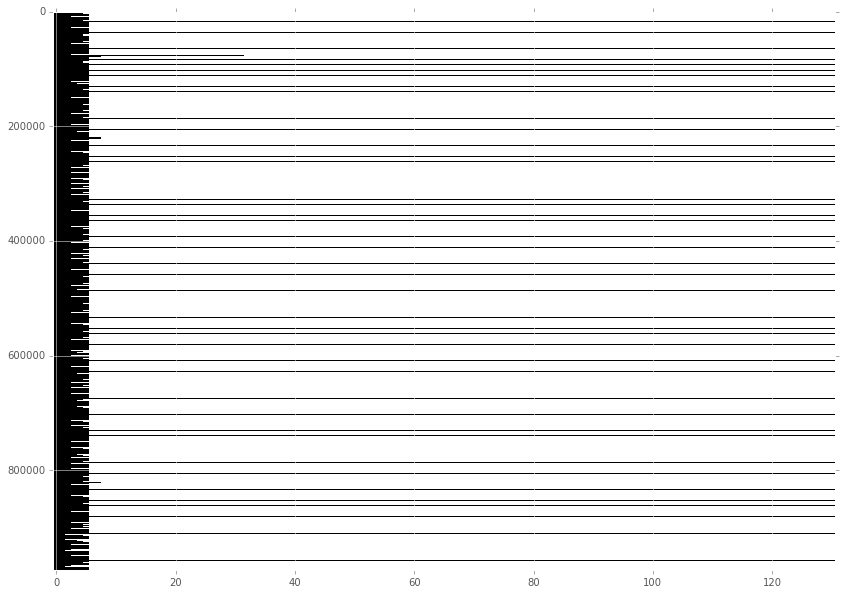

In [8]:
if plot_data_aspects:
    NullMat=D.isnull().as_matrix()
    mpl.pyplot.imshow(~NullMat, cmap='Greys',  interpolation='nearest', aspect='auto')

***

## Unique row components

There are currently 34 components dumped into the muse data

In [9]:
# Acquire and print out all unique components
uniques = pandas.Series(D['Submod']).unique()
value_counts = pandas.Series(D['Submod']).value_counts()
print('UNIQUE PACKET TYPES\n' + "-"*90)
for i,u in enumerate(uniques):
    print("(%d)\t[%d count]\t%s" % (i,value_counts[u],u))

UNIQUE PACKET TYPES
------------------------------------------------------------------------------------------
(0)	[1 count]	 /muse/drlref
(1)	[87199 count]	/muse/acc
(2)	[379196 count]	/muse/eeg
(3)	[23516 count]	/muse/eeg/quantization
(4)	[17213 count]	/muse/elements/alpha_relative
(5)	[17213 count]	/muse/elements/beta_relative
(6)	[17213 count]	/muse/elements/delta_relative
(7)	[17213 count]	/muse/elements/gamma_relative
(8)	[17213 count]	/muse/elements/theta_relative
(9)	[17213 count]	/muse/elements/horseshoe
(10)	[17213 count]	/muse/elements/is_good
(11)	[17213 count]	/muse/elements/blink
(12)	[17213 count]	/muse/elements/jaw_clench
(13)	[17213 count]	/muse/elements/touching_forehead
(14)	[17213 count]	/muse/elements/experimental/concentration
(15)	[17213 count]	/muse/elements/experimental/mellow
(16)	[17213 count]	/muse/elements/raw_fft0
(17)	[17213 count]	/muse/elements/raw_fft1
(18)	[17213 count]	/muse/elements/raw_fft2
(19)	[17213 count]	/muse/elements/raw_fft3
(20)	[17213 cou

## Helper Functions
Some functions that will make our lives easier below

In [10]:
def find_rightmost_empty(M):
    '''
    This method given a mxn matrix finds the rightmost column
    with an NaN value. This determines where for each packet type
    we stop our slicing.
    
    Input:    Numpy Matrix (hopefully cast into float, but may work with other types)
    Output:   Column number that NaNs begin the furthest from element 0 (furthest form the left)
    '''
    
    not_nan_M = ~np.isnan(M)
    (i,j) = np.nonzero(not_nan_M)
    #print('i elements %s' % str(i))
    #print('j elements %s' % str(j))
    return np.max(j)

def nestedAssignment(obj,addr,val):
    '''
    Deceptively simple method that takes a string list of keys and makes a nested assignment
    to the nested dictionary called obj = { { ... } } It finally plants the value at the end
    of the hiearachy of keys. It's able to be a few lines of code thanks to recursion and the
    "pass by reference" feature of the python language, different from matlab, which behaves
    like it passes by value ()
    '''
    if len(addr) > 1:
        
        key = addr.pop()

        try:
            test=obj[key]
        except KeyError:
            obj[key] = {}
        nestedAssignment(obj[key],addr,val)
    else:
        obj[addr.pop()] = val

def extract_into(into,at,what,rowtype):
    '''
    This method extracts rows containing `rowtype` (string) from the `what` pandas object (using the Submod column).
    It then places the result into the dict `into`, at the location represented by `at`. `at` is a list.
    Each element, in order, is a key, indexing `into`.
    
    In short notation it moves what[rowtype] -> into[at[1]][at[2]][...]
    
    At is an address of fields, ["A","B","C"] would be like settling our data into X.A.B.C
    
    Outputs: Modification of `into` to house the data at the specified nested field address. The output
    is a direct modification of the inputs. (Python functions can modify their inputs by reference.)
    '''
    global timestamp_zerod
    
    #Reverse order of at (I've set it up this way so that users can specifiy an address 'Raw','Data' in such
    # a way that Raw is the first index and data is the second. But my nestedAssignment method expects reverse
    # order because it treats the list as a stack using .pop() method)
    at = at[::-1]
    
    # Pick out the rows
    mask_rows = what['Submod'] == rowtype
    #print('Row type = %s' rowtype)
    #print("Sum of rows = %s, List = %s" % (str(mask_rows.sum()), str(mask_rows)))
    
    # Aquire data and associated timestamps
    data = what[mask_rows]
    del(data['Submod'])
    
    timestamps = data['Timestamps'].values
    timestamps = np.reshape(timestamps, (-1,1) )
    del(data['Timestamps'])
    if timestamp_zerod:
        timestamps = timestamps - timestamps[0]
    
    data = data.as_matrix().astype('float')
    # Now, cut out columns lacking data
    rightmost_col = find_rightmost_empty(data)
    data = data[:,:rightmost_col+1]
    
    data = np.concatenate( (timestamps,data), axis=1)
    
    # Now, we place the data into the dict
    at_copy = at.copy() # the method takes advantage of pass by reference, so wee need to copy this
    nestedAssignment(into,at,data)
    # Then, 
    #at_copy[0] += "_timestamps"
    #nestedAssignment(into,at_copy,timestamps)
    
    # Return dict, data, and timestamp for this type of data
    #return data,timestamps
    

## Data Structure Creation

Using those, we can create different organization systems. The most natural, I think, is a functional split, eeg versus behavioral. But sampling size split also might be nice.  

### Functional Data Structure
This structure groups things by how the data types are used and follow the following structure,
`eeg` set containing `raw` components and `processed` components. Processed contains the **Muse** processed elements in the various frequency bands.

#### Dict: `eeg`

In [11]:
# Our master structure to contain extracted data
eeg = {};

Add the configuration information to the struct. The string has to be manipulated a bit before it's ready to add...

In [12]:
last_conf = D[D['Submod'] == '/muse/config'].iloc[-1]
last_conf = list(last_conf.values)
last_conf = last_conf[2:]
last_conf = list(map(lambda x: str(x), last_conf))
for i,elem in enumerate(last_conf):
    if elem == 'nan':
        continue
    if str.isalpha(elem[1]):
        
        last_conf[i] = '"' + last_conf[i]
        
        loc = last_conf[i].find(":")
        last_conf[i] = last_conf[i][:loc] + '"' + last_conf[i][loc:]
        
conf_str = ''
for i,elem in enumerate(last_conf):
    if elem == "nan":
        continue
    else:
        conf_str = conf_str + str(elem) + ", "

conf_str = conf_str[1:-3]
conf_str = re.sub("true","True",conf_str)
eeg['configuration'] = eval(conf_str)

Here, we place raw data and its timestamps into the `eeg` dictionary

In [13]:
# Place raw data
extract_into(eeg,['raw'],D,'/muse/eeg')

A little extra processing to separate DRL and REF into separate elements. This is so that signal electrode portion remains robust to change. If last two columns are DRL and REF, and if in the future, if sets the option to not print them in muse (readable from /muse/config) to not write said signals in /eeg/raw, this will be rather easy to place an if statement below and electrode signals thusly always are under a separate key. Otherwise, I can forsee people hardcoding exclusions of the last two columns in downstream analysis, columns that might disappear depending on muse options.

In [14]:
# Separate REF/DRL components into different terms, if reference and DRL exist
if eeg['configuration']['eeg_channel_count'] > 4:
    print('Separating reference and drl data ...')
    eeg['misc'] = {}
    eeg['misc']['ref'] = eeg['raw'][:,(0, -1)]
    eeg['misc']['drl'] = eeg['raw'][:,(0, -2)]
    eeg['raw'] = np.delete(eeg['raw'], (-1), 1)
    eeg['raw'] = np.delete(eeg['raw'], (-1), 1)

We also need to potentially remove the mean from EEG signal channels, so when users execute an FFT/Spectrogram/etc, they don't get crazy DC artifacts.

In [15]:
means=np.mean(eeg['raw'],axis=0)
means[0] = 0 # we don't want to normalize the timestamps
eeg['raw'] = eeg['raw'] - means
del(means) # remove `means` from workspace

Plot the data, if flag is set in section 1.1

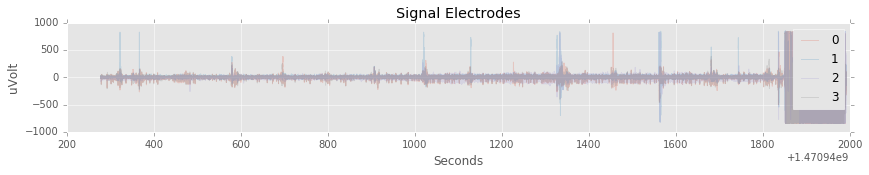

In [16]:
# Show data, if option given
if plot_data_aspects:
    plt.figure(dpi=220,figsize = (12,6))

    ax = plt.subplot(3,1,1)
    plt.plot(eeg['raw'][:,0],eeg['raw'][:,1:],alpha=0.2,lw=1)
    ax.set_xlabel('Seconds')
    ax.set_ylabel('uVolt')
    ax.set_title('Signal Electrodes')
    plt.legend(list(range(eeg['raw'][:,1:5].shape[0])))
    if eeg['configuration']['eeg_channel_count'] > 4:
        ax=plt.subplot(3,1,2)
        plt.plot(eeg['raw'][:,0],eeg['misc']['drl'][:,1],alpha=0.2,lw=3)
        ax.set_title('DRL (Driven Right Leg Circuit) Signal')
        ax.set_xlabel('Seconds')
        ax=plt.subplot(3,1,3)
        plt.plot(eeg['raw'][:,0],eeg['misc']['ref'][:,1],alpha=0.2,lw=2)
        ax.set_xlabel('Seconds')
        ax.set_ylabel('uVolt')
        ax.set_title('Reference Electrode')
    plt.tight_layout(pad=0.5)
    

Now that raw data lives in the dictionary, we have relative and absolute signals that we can add to the dictionary.

In [17]:
# Which fields to place into relatives and absolutes
relatives = [
    '/muse/elements/alpha_relative',
    '/muse/elements/beta_relative',
    '/muse/elements/delta_relative', 
    '/muse/elements/gamma_relative', 
    '/muse/elements/theta_relative',
]
absolutes = [
    '/muse/elements/alpha_absolute',
    '/muse/elements/beta_absolute',
    '/muse/elements/delta_absolute',
    '/muse/elements/gamma_absolute',
    '/muse/elements/theta_absolute',
    '/muse/elements/low_freqs_absolute'
]
sess_scores = [
    '/muse/elements/alpha_session_score',
    '/muse/elements/beta_session_score',
    '/muse/elements/delta_session_score',
    '/muse/elements/gamma_session_score',
    '/muse/elements/theta_session_score',
]

# Set relatives into eeg dictionary
for elem in relatives:
    
    null,name = os.path.split(elem)
    name = re.sub(r'_relative','',name)
    
    extract_into(eeg,['rel',name],D,elem)
    
# Set absolutes into eeg dictionary
for elem in absolutes:
    
    null,name = os.path.split(elem)
    name = re.sub(r'_absolute','',name)
    
    extract_into(eeg,['abs',name],D,elem)

# Set session scores into eeg dictionary
for elem in sess_scores:
    
    null,name = os.path.split(elem)
    name = re.sub(r'_session_score','',name)
    
    extract_into(eeg,['sess',name],D,elem)

Last, the FFT should go into the `eeg` dictionary

In [18]:
# Prepare to store fft data
fft = [
    "/muse/elements/raw_fft0",
    "/muse/elements/raw_fft1",
    "/muse/elements/raw_fft2",
    "/muse/elements/raw_fft3"
]
# Carry out normal extraction of entries
for elem in fft:
    
    print(elem)
    
    null,name = os.path.split(elem)
    number = re.sub(r'raw_fft','',name)
    
    extract_into(eeg,['fft',number],D,elem)

fft = np.empty_like( eeg['fft'][ list(eeg['fft'].keys())[0] ]  )
# Post-process, where take all separate fft entries and combine them into a 3D array
#  Nsamples x (Ncomponents+1) x 
for key,val in eeg['fft'].items():
    fft = np.dstack((fft, eeg['fft'][key]))
    
eeg['fft'] = fft[:,:,1:]

/muse/elements/raw_fft0
/muse/elements/raw_fft1
/muse/elements/raw_fft2
/muse/elements/raw_fft3


#### Dict: `behavior`

First, create a behavior dictionary

In [19]:
behavior = {}

Then, place the headband signals int that dictionary

In [20]:
headband = [
    "/muse/elements/touching_forehead",
    "/muse/elements/horseshoe",
    "/muse/elements/is_good"
]

for elem in headband:
    
    null,name = os.path.split(elem)
    name = re.sub(r'/muse/elements/','',name)
    
    extract_into(behavior,['headband',name],D,elem)

Next, muscle signals into `behavior`

In [21]:
muscle = [
    "/muse/elements/blink",
    "/muse/elements/jaw_clench"
]

for elem in muscle:
    
    null,name = os.path.split(elem)
    name = re.sub(r'/muse/elements/','',name)
    
    extract_into(behavior,['muscle',name],D,elem)

Finally, acceleration

In [22]:
extract_into(behavior,['accel'],D,'/muse/acc')

#### Description
Now that data are in place, here, a description field will be appended with descriptions of the data.

In [23]:
# Appending descriptions for EEG dict
eeg['desc'] = {}
eeg['desc']['raw'] = "The first column indicate timestamps or time. The last two columns are DRL and REF signals that were used to reference the eeg signals present in columns 2 through end-2."
eeg['desc']['abs_all'] = "Fields for each absolute power band extracted by Muse. Absolute band power is log(sum(PSD)) of the absolute frequency range. Within each band type, indicated by the fields, the first column is the timestamp or time. Remaining columns are the power present per field."
eeg['desc']['rel_all'] = "Fields for each relative power band extracted by Muse. Relative power is gotten via first summing absolutes linear-power for a band by the sum of all linear-absolute power for all band types. Within each band type, indicated by the fields, the first column is the timestamp or time. Remaining columns are the power present per field."
eeg['desc']['sess_all'] = "Fields correspond to the session scores for a particular band, (electrodes in the columns). Session scores summarize the relative power seen on an eeg."
eeg['desc']['fft'] = "Each page of this 3D matrix corresponds to an electrode. The first column is timestamp value. The remaining columns are fft values for that timestamp. As of this version, 129 columns with power, each 0.86hz per bin (220/256). Symmetric portion of the 256 sample removed, thus 128 bins. The last bin is 0Hz."
eeg['desc']['misc'] = "Holds the reference and DLG circuit signals, in case one would like to add reference or DLG back in."
eeg['desc']['config'] = "Contains all of the configuration information dropped into the last provided packet of configuration data. This contains all sorts of information, like sampling rates, et cetera. You don't have to hardcode those values, in case future muse versions change properties."
# Appending descriptions for the behavior dict
behavior['desc'] = {}
behavior['desc']['headband'] = "Signals regarding whether the subject has their headband touching/connected."
behavior['desc']['muscles'] = "Signals regarding subjects eyeblink and jaw-clench."
behavior['desc']['acc'] = "Signals regarding the subjects head acceleration."

# Data Scrub: Game File
Last major series of operations concerns the game file, with its timestamped events. This will be considerably easier becasuse different data types do not live on different rows. They live on different columns--columns who do not change their meaning conditionally on the row.

## Modify/Input Space-separated File

In [24]:

# The following is what game heeder is assumed to be if the game header doesn't already
# exist in the file
game_header = ["timestamps","eventType","gameId", "userId", "level", "age","mode", "gameTime",
                   "lastBirth", "eventId", "visual", "audio", "side", "action", "actionTime",
                   "reaction", "key", "correct", "consistent"]

# Acquire the file name from the csv filename provided above, swapping in "txt"
# for the "csv" postfix.
gamefile = re.sub(r'\.csv','.txt', root_fname)
print('Gamefile = %s' % gamefile)

# Read first line, to see if we should add header text and if
# there is a space at the top of the file to delete
with open(gamefile,'r') as file:
    totally_raw_file = False # if detected, this file type needs to be processed in a different way
    haveToDeleteBlank = False # some files have a blank at the top, in which case we have to squash it
    lineone = file.readline()
    if lineone is "\n":
        print('Blank line detected atop! Have to delete it...')
        haveToDeleteBlank = True
        linetwo=file.readline()
        if linetwo is "[":
            totally_raw_file = True
    elif lineone == '[\n':
        print('Totally raw gamefile detected!')
        totally_raw_file = True
    lineone = lineone.split(' ')
# If the file is totally raw (direct save of FishPolice output), we execute a 
# different transformation then if the file derives from post-processed game
# files
if totally_raw_file is True:
    
    for linenum,line in enumerate( fileinput.FileInput(gamefile,inplace=1) ):
        
        transformed_line = line[3:-3]
        # The following check is added because sometimes a line is dropped with extra characters at the end
        # courtesy of fishpolice's gamelog toString function
        while len(transformed_line) > 0 and (transformed_line[-1] == ',' or transformed_line[-1] == '"' or transformed_line[-1] == ' '):
            transformed_line=transformed_line[0:-1]
        
        if linenum is 1:
            print(' '.join(game_header))
            continue
        
        if linenum is 0 or line == "[\n" or line == "]" or line == "]\n":
            continue
        
        print(transformed_line) # when this type of fileinput object is opened, the output is redirected from standard out (to the console) to a file output
            
    fileinput.close()
    
# Else, we might be getting a partially processed file from another processing script;
# So, decide if we need to append a header and if we need to delete a space
elif lineone[0] != game_header[0]:
    
    print('Fixing header with first line element %s\n\n' \
          % (lineone[0]))

    # Contruct the line to append
    header_string_to_write = "";
    for c in game_header:
        header_string_to_write += c + " "
    header_string_to_write = header_string_to_write[0:-1]
    
    # Prepend header to csv
    for linenum,line in enumerate( fileinput.FileInput(gamefile,inplace=1) ):
        
        if linenum is 0:
            print(header_string_to_write)
            
            if haveToDeleteBlank is not True:
                print(line.rstrip())
        else:
            print(line.rstrip())
        
    fileinput.close()
# Otherwise, our file is almost surely in the correct form
else:
    print('Header is good')

Gamefile = /Users/ryoung/Documents/LabRotations/Sekuler/Data/s4.txt
Header is good


## Bring into `pandas.DataFrame`
Import into data frame and display it, to sanity check the data

In [25]:
G = pandas.read_csv(gamefile,sep=' ')
G.set_index(game_header[0]) # set index to timestamps; whatever the field is called (see game_header list), it is assumed to be the first column
G

,timestamps,eventType,gameId,userId,level,age,mode,gameTime,lastBirth,eventId,visual,audio,side,action,actionTime,reaction,key,correct,consistent
0,1.470939e+09,1,1,1,0,0,1,1470939336382,1547,1,8,8,2,1,1470939338260,1877,73,1,1.0
1,1.470939e+09,2,1,1,0,0,1,1470939336382,1547,1,8,8,2,1,1470939338260,1877,73,1,1.0
2,1.470939e+09,1,1,1,0,0,1,1470939339384,4548,2,3,8,1,1,1470939340260,876,85,1,2.0
3,1.470939e+09,2,1,1,0,0,1,1470939339384,4548,2,3,8,1,1,1470939340260,876,85,1,2.0
4,1.470939e+09,1,1,1,0,0,1,1470939342385,7549,3,8,8,1,1,1470939343291,906,73,1,1.0
5,1.470939e+09,2,1,1,0,0,1,1470939342385,7549,3,8,8,1,1,1470939343291,906,73,1,1.0
6,1.470939e+09,1,1,1,0,0,1,1470939345385,10550,4,8,0,1,1,1470939346203,817,73,1,3.0
7,1.470939e+09,2,1,1,0,0,1,1470939345385,10550,4,8,0,1,1,1470939346203,817,73,1,3.0
8,1.470939e+09,1,1,1,0,0,1,1470939348386,13550,5,3,8,1,1,1470939349315,929,85,1,2.0
9,1.470939e+09,2,1,1,0,0,1,1470939348386,13550,5,3,8,1,1,1470939349315,929,85,1,2.0


## Dict: `game`
Unlike the above section, getting a dict of our values here is going to be easy-cheesy. DataFrame has a nice method that will give us what we want.

In [26]:
game = G.to_dict(orient='list')
checkGameDict = False
if checkGameDict:
    str(game)

We now have a dict with a python list of values, but we should convert to numpy to help write to matlab format and to have type consistency.

In [27]:
# Cast each list into numpy and add timestamp to first column
for key,val in game.items():
    val = np.array(val,dtype='float64')
    game[key] = val

In [28]:
if timestamp_zerod:
    game['timestamps'] = game['timestamps'] - game['timestamps'][0]

Last, as with `eeg` and `behavior`, packaging data with rudimentary description is always a good idea.

In [29]:
# game['desc'] = {}
# game['desc']['eventId'] = "Event # within that the level epoch."
# game['desc']['userId'] = "Number identifying a user. If multiple numbers, then multiple users in the data."
# game['desc']['age'] = "Integer indicating the age category (see age pulldown menu in game)."
# game['desc'][''] = "Integer indicating the age category (see age pulldown menu in game)."

## Visualizing Game Data

If plotting flags are set, we will plot the nature of each of the variables in the game.txt file, for a bird's eye view of the data.

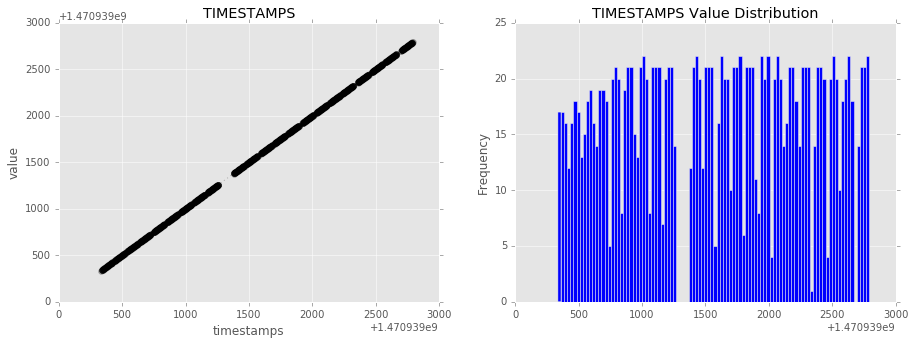

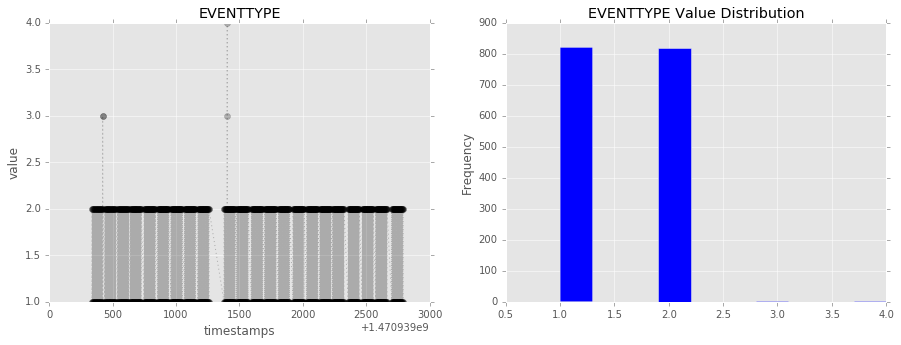

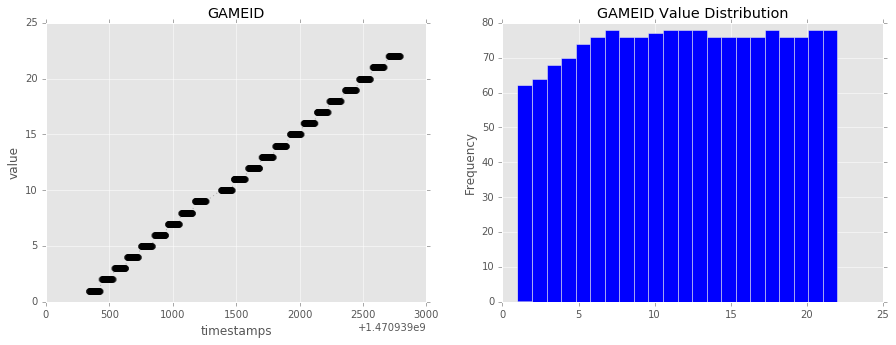

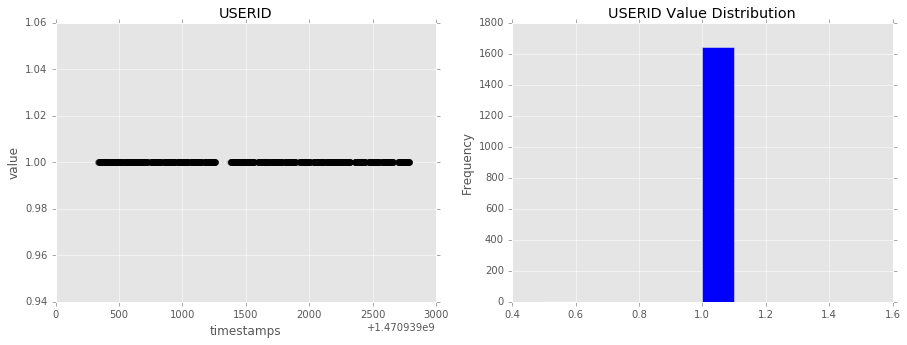

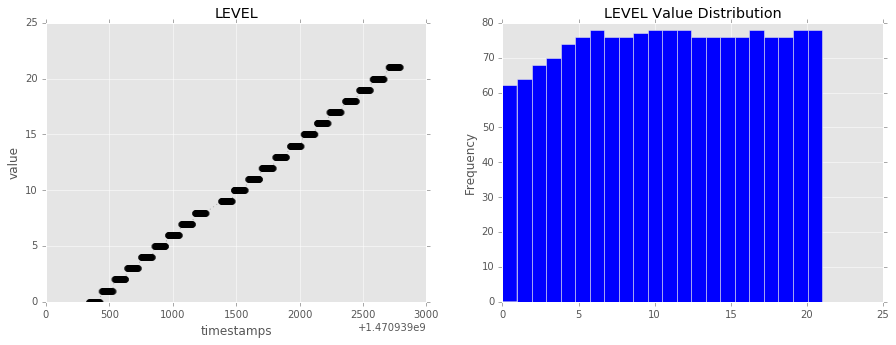

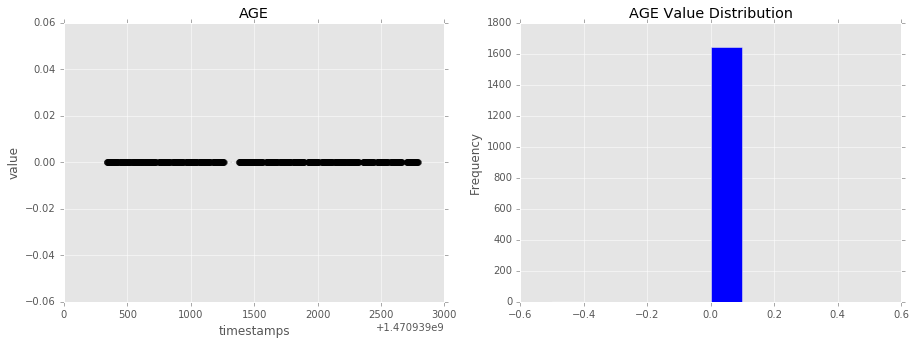

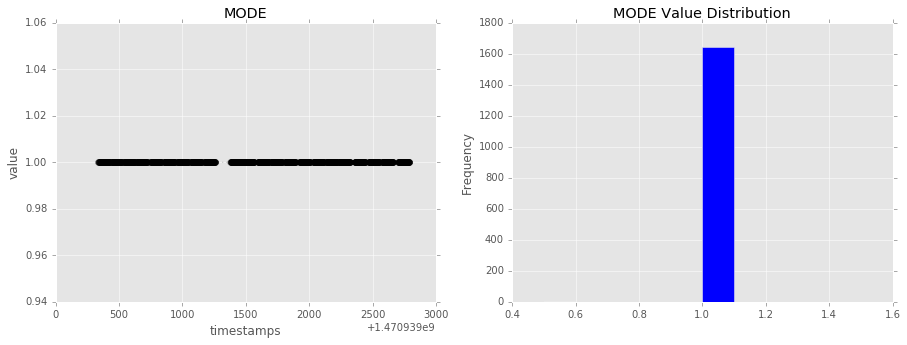

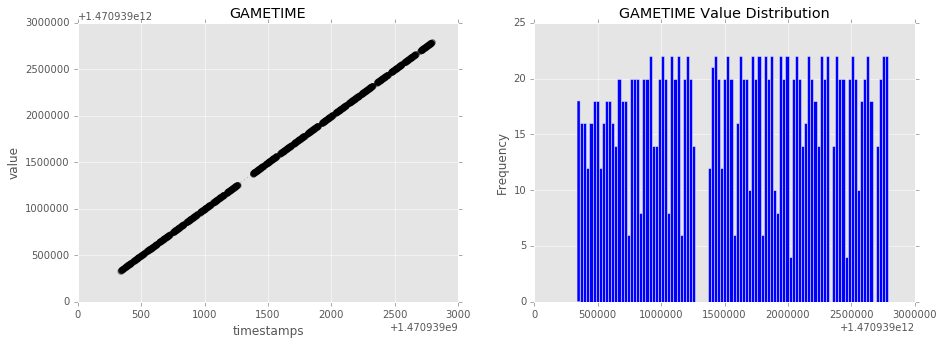

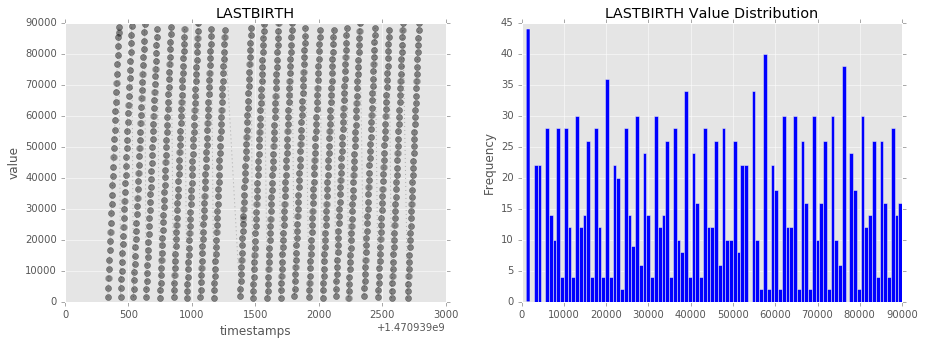

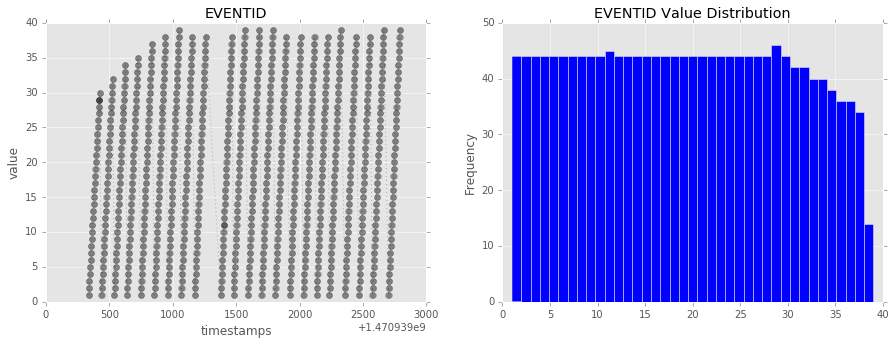

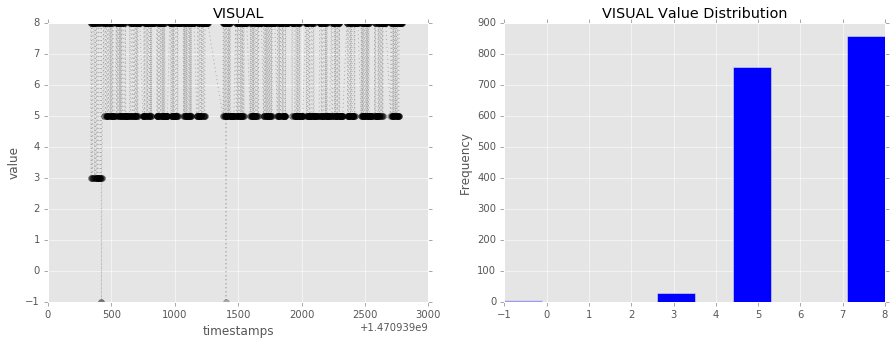

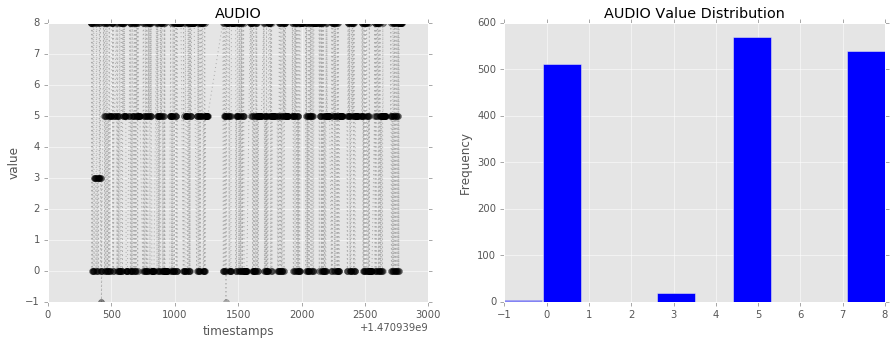

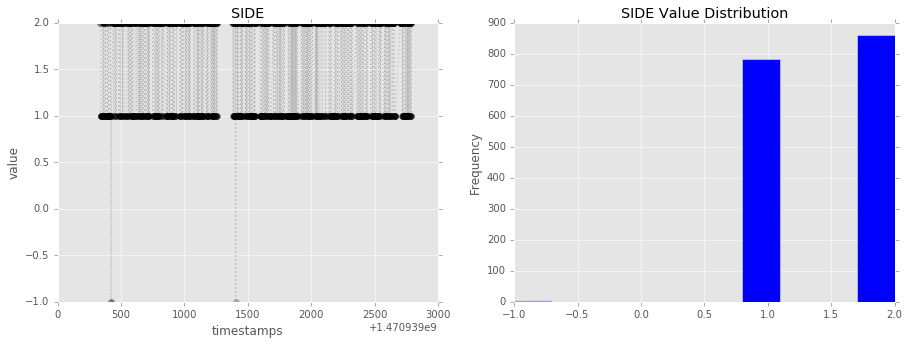

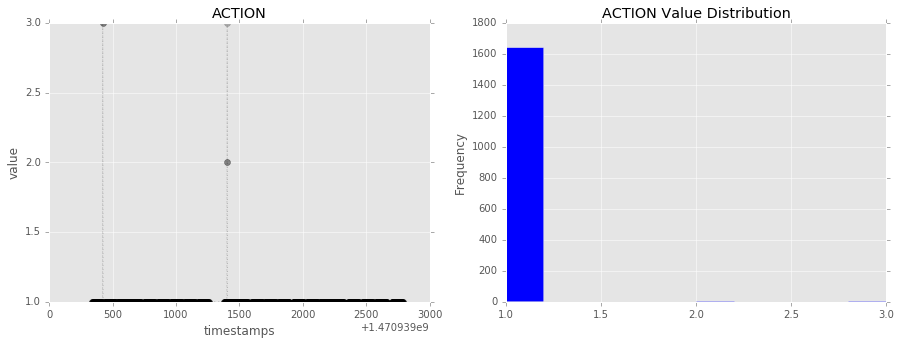

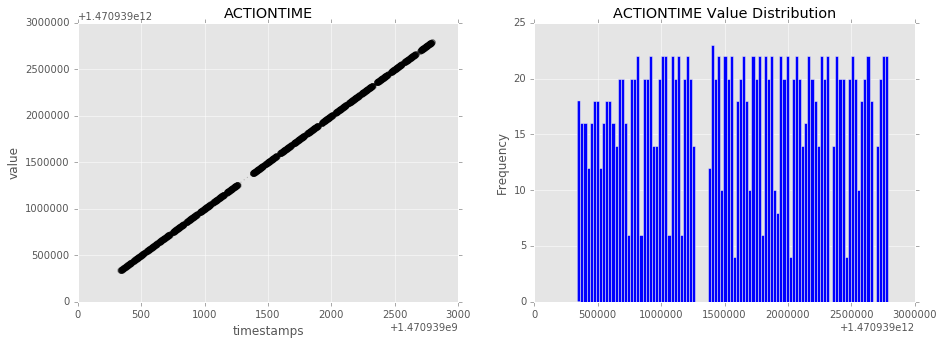

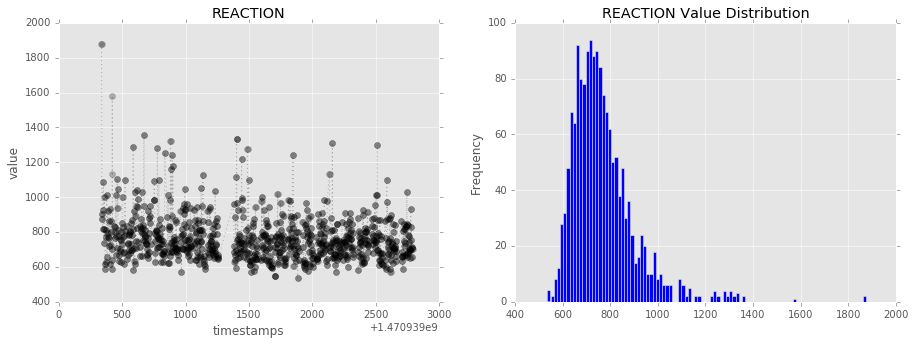

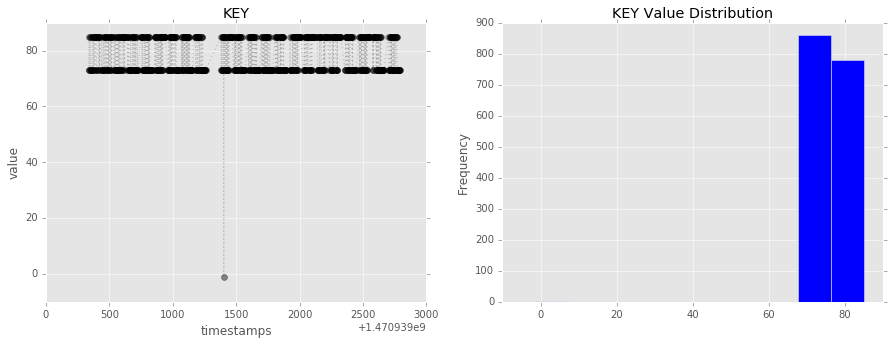

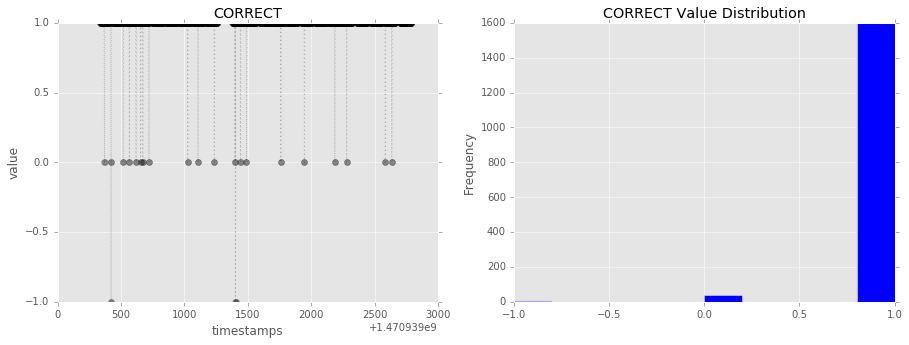

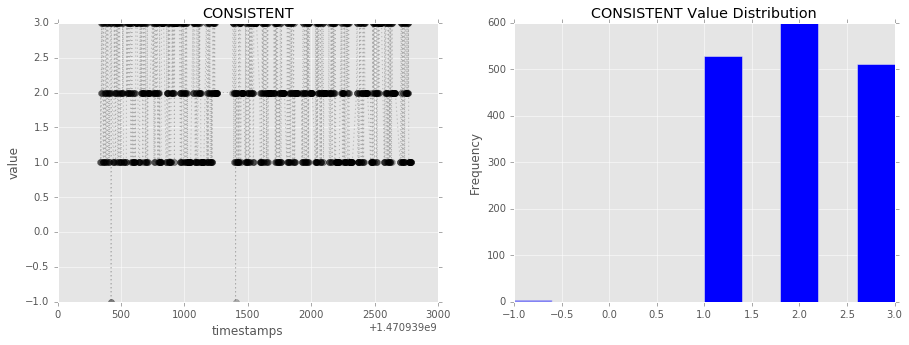

In [30]:
for c in G.columns:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    if c is "timestamps":
        G[c].plot(marker='ko',alpha=0.25)
    else:
        plt.plot(G['timestamps'],G[c].values,'ko:',alpha=0.25)
        plt.xlabel('timestamps')
        plt.ylabel('value')
    plt.title(c.upper())
    plt.subplot(1,2,2)
    uniques_c = np.unique(G[c].values)
    bincount = np.min((100, np.max((uniques_c.size,10)) ))
    G[c].plot.hist(bins=bincount,color='b')
    plt.title(c.upper() + " Value Distribution")

Now, to be consistent with other structures, we will place timestamps into first column for each field

In [31]:
# Make timestamp as first column of each data type, to match other data we've scrubbed.
for key,val in game.items():
    if key == "timestamps":
        continue
    val = np.array( (game['timestamps'],val) )
    val = val.transpose()
    game[key] = val
    
# Remove timestamps as special field
del(game['timestamps'])

# Saving Data

In [32]:
root_fname

'/Users/ryoung/Documents/LabRotations/Sekuler/Data/s4.csv'

In [33]:
# Acquire base directory and file for all save options
dir,file = os.path.split(root_fname)
                         
file,ext = os.path.splitext(file)

## Matlab Native
Matlab can read the pickled dictionaries above and pretty easily turn them into strings, but scipy offers a more native approach, packaing and reading from .mat files with ease.

In [34]:

savestr = dir + '/' + file + '.structs.mat'
scipy.io.savemat( savestr, {'behavior':behavior, "eeg":eeg, "game":game} )

A second type of format saved, where instead of separate structs, one master struct.

In [35]:
savestr = dir + '/' + file + '.masterstruct.mat'
scipy.io.savemat( savestr, {"m":{'beh':behavior, "eeg":eeg, "game":game}} )

## Python Native
### Pickle Data Frames

In [36]:
if save_data_frame:
    D.to_pickle(dir + '/' + file + '.muse.pandas.pickle')
    G.to_pickle(dir + '/' + file + '.game.pandas.pickle')

### Pickle EEG / Behavior / Game Dictionaries

In [37]:
behaviorstr = dir + '/' + file + '.behavior.pickle'
pickle.dump( behavior,  open(behaviorstr,  'wb'))

In [38]:
eegstr = dir + '/' + file + '.eeg.pickle'
pickle.dump( eeg,       open(eegstr,       'wb'))

In [39]:
gamestr = dir + '/' + file + '.game.pickle'
pickle.dump( game,       open(gamestr,       'wb'))